In [2]:
import pandas as pd
import numpy as np
import pickle
import itertools

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt

from matplotlib import rcParams

In [4]:
import statsmodels.formula.api as smf

# Linear Regression (MEPS 2015 Data)

In [5]:
data = pickle.load(open('categorical_meps_2015.pkl', 'rb'))

In [6]:
data.head()

,ER_exp,age,dx_COPD,dx_IHD,dx_arth,dx_asth,dx_canc,dx_diab,dx_hyplp,dx_hyptn,...,tot_mcr_exp,tot_prv_exp,tot_slf_exp,user_id,tot_exp_cats,tot_slf_cats,tot_mcr_cats,tot_mcd_cats,tot_prv_cats,age_cat
0,772,53,Yes,Yes,Yes,No,No,Yes,Yes,Yes,...,40320,0,375,60001101,$4033-$700771,$228-$692,$7803-$421571,$1560-$534580,$0,45-64
1,362,56,No,No,Yes,Yes,No,Yes,Yes,Yes,...,2959,0,11,60001102,$4033-$700771,$1-$63,$2168-$7802,$1560-$534580,$0,45-64
2,0,30,No,No,No,No,No,No,No,No,...,0,0,0,60001103,$0,$0,$0,$0,$0,25-44
3,381,23,No,No,No,No,No,No,No,No,...,0,0,22,60001104,$332-$1098,$1-$63,$0,$433-$1559,$0,18-24
4,0,3,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,...,0,0,77,60001105,$1099-$4032,$63-$227,$0,$1560-$534580,$0,0-4


In [7]:
# Load relevant variables
chron_dx_categs = ['dx_arth', 'dx_asth', 'dx_canc', 'dx_COPD', 'dx_diab', 'dx_hyplp', 'dx_hyptn', 'dx_IHD', 'dx_strk']

In [8]:
outlying_exp_vals = data[data.tot_exp > 250000].tot_exp.tolist()

In [9]:
# Truncate costs at 250,000 to control for outliers
def truncate_250k(lst):
    if len(lst)==0:
        data['tot_exp'] = data['tot_exp']
    else:
        data['tot_exp'] = data['tot_exp'].replace(lst, 250000)

truncate_250k(outlying_exp_vals)

In [10]:
data[data.tot_exp > 250000]

,ER_exp,age,dx_COPD,dx_IHD,dx_arth,dx_asth,dx_canc,dx_diab,dx_hyplp,dx_hyptn,...,tot_mcr_exp,tot_prv_exp,tot_slf_exp,user_id,tot_exp_cats,tot_slf_cats,tot_mcr_cats,tot_mcd_cats,tot_prv_cats,age_cat


### Regression statistics by age

In [11]:
lm = smf.ols(formula='tot_exp ~ age_cat', data=data).fit()

In [12]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tot_exp   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     454.7
Date:                Thu, 07 Jun 2018   Prob (F-statistic):               0.00
Time:                        14:13:05   Log-Likelihood:            -3.7861e+05
No. Observations:               35014   AIC:                         7.572e+05
Df Residuals:                   35008   BIC:                         7.573e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1431.0365    270.811      5.284      0.000     900.238    1961.835
age_cat[T.5-17]    -52.0279    305.419     -0.170      0.865    -650.658     546.602
age_cat[T.18-24]   225.5028    341.234      0.661      0.509    -443.327     894.332
age_cat[T.25-44]  1448.7235    297.791      4.865      0.000     865.044    2032.403
age_cat[T.45-64]  4614.3466    300.401     15.361      0.000    4025.551    5203.142
age_cat[T.65-85]  9256.5821    324.932     28.488      0.000    8619.704    9893.460
==============================================================================
Omnibus:                    50524.759   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         20185383.825
Skew:                           8.688   Prob(JB):                         0.00
Kurtosis:                     119.336   Cond. No.                         11.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Regression statistics by age, sex

In [13]:
lm = smf.ols(formula='tot_exp ~ age_cat + sex', data=data).fit()

In [14]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tot_exp   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     385.1
Date:                Thu, 07 Jun 2018   Prob (F-statistic):               0.00
Time:                        14:13:05   Log-Likelihood:            -3.7859e+05
No. Observations:               35014   AIC:                         7.572e+05
Df Residuals:                   35007   BIC:                         7.573e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1051.8493    278.226      3.781      0.000     506.517    1597.182
age_cat[T.5-17]    -36.1695    305.283     -0.118      0.906    -634.535     562.196
age_cat[T.18-24]   225.2766    341.070      0.660      0.509    -443.231     893.784
age_cat[T.25-44]  1429.8004    297.665      4.803      0.000     846.368    2013.233
age_cat[T.45-64]  4585.9563    300.295     15.272      0.000    3997.369    5174.544
age_cat[T.65-85]  9205.8940    324.890     28.335      0.000    8569.099    9842.689
sex[T.female]      758.3745    128.712      5.892      0.000     506.094    1010.655
==============================================================================
Omnibus:                    50569.242   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         20294106.559
Skew:                           8.701   Prob(JB):                         0.00
Kurtosis:                     119.651   Cond. No.                         13.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Regression statistics by age, sex, diagnosis

In [15]:
lm = smf.ols(formula='tot_exp ~ age_cat + sex + dx_canc + dx_arth + dx_asth + dx_COPD + dx_diab + dx_hyplp + dx_hyptn + dx_IHD + dx_strk', data=data).fit()

In [16]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tot_exp   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     263.4
Date:                Thu, 07 Jun 2018   Prob (F-statistic):               0.00
Time:                        14:13:05   Log-Likelihood:            -2.7965e+05
No. Observations:               25680   AIC:                         5.593e+05
Df Residuals:                   25665   BIC:                         5.595e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.788e+04    742.880     37.525      0.000    2.64e+04    2.93e+04
age_cat[T.5-17]   4615.8522   1511.561      3.054      0.002    1653.108    7578.596
age_cat[T.18-24]  5092.6828    396.216     12.853      0.000    4316.077    5869.288
age_cat[T.25-44]  5553.7102    362.484     15.321      0.000    4843.221    6264.199
age_cat[T.45-64]  5984.5262    353.356     16.936      0.000    5291.928    6677.124
age_cat[T.65-85]  6629.5079    368.690     17.981      0.000    5906.855    7352.161
sex[T.female]      807.7579    164.505      4.910      0.000     485.319    1130.197
dx_canc[T.No]    -4735.2462    305.178    -15.516      0.000   -5333.412   -4137.080
dx_arth[T.No]    -3505.1839    220.092    -15.926      0.000   -3936.577   -3073.791
dx_asth[T.No]    -1861.6585    285.085     -6.530      0.000   -2420.441   -1302.876
dx_COPD[T.No]    -2674.1975    626.225     -4.270      0.000   -3901.635   -1446.760
dx_diab[T.No]    -3763.1363    284.902    -13.209      0.000   -4321.561   -3204.712
dx_hyplp[T.No]    -601.5371    214.354     -2.806      0.005   -1021.683    -181.392
dx_hyptn[T.No]   -1339.6585    211.605     -6.331      0.000   -1754.416    -924.901
dx_IHD[T.No]     -6199.9643    401.816    -15.430      0.000   -6987.546   -5412.383
dx_strk[T.No]    -7456.8487    430.187    -17.334      0.000   -8300.039   -6613.658
==============================================================================
Omnibus:                    34312.833   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9317355.162
Skew:                           7.595   Prob(JB):                         0.00
Kurtosis:                      95.071   Cond. No.                     1.15e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.65e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Regression statistics by age, sex, diagnosis, RH31

In [17]:
lm = smf.ols(formula='tot_exp ~ age_cat + sex + dx_canc + dx_arth + dx_asth + dx_COPD + dx_diab + dx_hyplp + dx_hyptn + dx_IHD + dx_strk + rh31', data=data).fit()

In [18]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tot_exp   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     229.7
Date:                Thu, 07 Jun 2018   Prob (F-statistic):               0.00
Time:                        14:13:06   Log-Likelihood:            -2.7406e+05
No. Observations:               25173   AIC:                         5.482e+05
Df Residuals:                   25154   BIC:                         5.483e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2.267e+04    802.029     28.261      0.000    2.11e+04    2.42e+04
age_cat[T.5-17]    3748.6368   1537.474      2.438      0.015     735.098    6762.176
age_cat[T.18-24]   4029.8087    405.560      9.936      0.000    3234.887    4824.730
age_cat[T.25-44]   4310.5099    374.897     11.498      0.000    3575.689    5045.330
age_cat[T.45-64]   4765.0016    366.115     13.015      0.000    4047.395    5482.609
age_cat[T.65-85]   5812.5609    377.046     15.416      0.000    5073.530    6551.592
sex[T.female]       745.3997    165.842      4.495      0.000     420.340    1070.459
dx_canc[T.No]     -4495.2829    306.984    -14.643      0.000   -5096.990   -3893.575
dx_arth[T.No]     -2860.2960    223.782    -12.782      0.000   -3298.922   -2421.670
dx_asth[T.No]     -1503.5251    287.862     -5.223      0.000   -2067.752    -939.298
dx_COPD[T.No]     -1135.0425    634.866     -1.788      0.074   -2379.417     109.332
dx_diab[T.No]     -2937.8042    290.537    -10.112      0.000   -3507.273   -2368.335
dx_hyplp[T.No]     -436.1942    215.504     -2.024      0.043    -858.594     -13.795
dx_hyptn[T.No]     -878.5800    215.062     -4.085      0.000   -1300.114    -457.046
dx_IHD[T.No]      -5482.2465    405.106    -13.533      0.000   -6276.277   -4688.216
dx_strk[T.No]     -6530.8790    435.221    -15.006      0.000   -7383.937   -5677.821
rh31[T.Very Good]   344.8122    221.925      1.554      0.120     -90.174     779.798
rh31[T.Good]       1060.9478    232.757      4.558      0.000     604.731    1517.165
rh31[T.Fair]       3252.3129    305.154     10.658      0.000    2654.194    3850.432
rh31[T.Poor]       9416.5363    482.244     19.527      0.000    8471.311    1.04e+04
==============================================================================
Omnibus:                    33414.011   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8914640.203
Skew:                           7.503   Prob(JB):                         0.00
Kurtosis:                      93.962   Cond. No.                     2.65e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.11e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Regression statistics by age, sex, diagnosis, MH31

In [19]:
lm = smf.ols(formula='tot_exp ~ age_cat + sex + dx_canc + dx_arth + dx_asth + dx_COPD + dx_diab + dx_hyplp + dx_hyptn + dx_IHD + dx_strk + mh31', data=data).fit()

In [20]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tot_exp   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     210.3
Date:                Thu, 07 Jun 2018   Prob (F-statistic):               0.00
Time:                        14:13:06   Log-Likelihood:            -2.7412e+05
No. Observations:               25166   AIC:                         5.483e+05
Df Residuals:                   25147   BIC:                         5.484e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2.633e+04    774.836     33.979      0.000    2.48e+04    2.78e+04
age_cat[T.5-17]    4163.6906   1545.852      2.693      0.007    1133.730    7193.651
age_cat[T.18-24]   4793.2662    405.540     11.819      0.000    3998.383    5588.149
age_cat[T.25-44]   5263.7961    371.764     14.159      0.000    4535.118    5992.474
age_cat[T.45-64]   5719.2976    363.019     15.755      0.000    5007.759    6430.836
age_cat[T.65-85]   6387.9456    377.597     16.917      0.000    5647.834    7128.057
sex[T.female]       798.5592    166.752      4.789      0.000     471.715    1125.403
dx_canc[T.No]     -4726.8807    308.213    -15.336      0.000   -5330.997   -4122.764
dx_arth[T.No]     -3260.4526    223.698    -14.575      0.000   -3698.914   -2821.991
dx_asth[T.No]     -1725.2608    289.228     -5.965      0.000   -2292.164   -1158.358
dx_COPD[T.No]     -2352.5525    634.597     -3.707      0.000   -3596.400   -1108.705
dx_diab[T.No]     -3606.7134    289.104    -12.475      0.000   -4173.374   -3040.052
dx_hyplp[T.No]     -520.8609    216.520     -2.406      0.016    -945.253     -96.469
dx_hyptn[T.No]    -1217.3431    214.139     -5.685      0.000   -1637.068    -797.619
dx_IHD[T.No]      -6076.3517    405.945    -14.968      0.000   -6872.028   -5280.676
dx_strk[T.No]     -7067.1355    437.510    -16.153      0.000   -7924.680   -6209.591
mh31[T.Very Good]    55.2746    205.887      0.268      0.788    -348.276     458.826
mh31[T.Good]        725.5380    214.179      3.388      0.001     305.735    1145.341
mh31[T.Fair]       2407.4782    353.964      6.801      0.000    1713.688    3101.269
mh31[T.Poor]       6707.5963    648.535     10.343      0.000    5436.430    7978.762
==============================================================================
Omnibus:                    33561.460   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9034343.600
Skew:                           7.570   Prob(JB):                         0.00
Kurtosis:                      94.578   Cond. No.                     2.02e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.32e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Regression statistics by age, sex, diagnosis, RH31, MH31

In [21]:
lm = smf.ols(formula='tot_exp ~ age_cat + sex + dx_canc + dx_arth + dx_asth + dx_COPD + dx_diab + dx_hyplp + dx_hyptn + dx_IHD + dx_strk + rh31 + mh31', data=data).fit()

In [22]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tot_exp   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     188.7
Date:                Thu, 07 Jun 2018   Prob (F-statistic):               0.00
Time:                        14:13:07   Log-Likelihood:            -2.7387e+05
No. Observations:               25158   AIC:                         5.478e+05
Df Residuals:                   25135   BIC:                         5.480e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2.262e+04    802.643     28.188      0.000    2.11e+04    2.42e+04
age_cat[T.5-17]    3649.0197   1536.609      2.375      0.018     637.176    6660.863
age_cat[T.18-24]   4028.1423    405.443      9.935      0.000    3233.450    4822.834
age_cat[T.25-44]   4321.5659    374.677     11.534      0.000    3587.177    5055.955
age_cat[T.45-64]   4786.8199    365.983     13.079      0.000    4069.471    5504.168
age_cat[T.65-85]   5839.0002    377.138     15.482      0.000    5099.788    6578.212
sex[T.female]       759.0317    165.810      4.578      0.000     434.034    1084.030
dx_canc[T.No]     -4494.0450    306.853    -14.646      0.000   -5095.495   -3892.594
dx_arth[T.No]     -2834.2087    223.853    -12.661      0.000   -3272.973   -2395.444
dx_asth[T.No]     -1495.3850    287.827     -5.195      0.000   -2059.543    -931.227
dx_COPD[T.No]     -1157.1121    634.535     -1.824      0.068   -2400.837      86.613
dx_diab[T.No]     -2962.6431    290.476    -10.199      0.000   -3531.992   -2393.294
dx_hyplp[T.No]     -434.8702    215.440     -2.019      0.044    -857.145     -12.595
dx_hyptn[T.No]     -866.2767    215.072     -4.028      0.000   -1287.830    -444.724
dx_IHD[T.No]      -5457.6625    405.192    -13.469      0.000   -6251.863   -4663.462
dx_strk[T.No]     -6512.8550    435.992    -14.938      0.000   -7367.425   -5658.285
rh31[T.Very Good]   448.9875    249.278      1.801      0.072     -39.612     937.587
rh31[T.Good]       1155.9899    271.885      4.252      0.000     623.078    1688.901
rh31[T.Fair]       3232.8061    347.900      9.292      0.000    2550.903    3914.709
rh31[T.Poor]       8897.0898    531.467     16.741      0.000    7855.384    9938.796
mh31[T.Very Good]  -192.7841    230.130     -0.838      0.402    -643.853     258.285
mh31[T.Good]       -199.5101    249.715     -0.799      0.424    -688.966     289.946
mh31[T.Fair]         28.2745    390.507      0.072      0.942    -737.142     793.691
mh31[T.Poor]       2715.8244    685.385      3.962      0.000    1372.430    4059.219
==============================================================================
Omnibus:                    33430.389   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8960369.748
Skew:                           7.517   Prob(JB):                         0.00
Kurtosis:                      94.224   Cond. No.                     1.59e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.81e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Regression statistics by age, sex, diagnosis, all RHs and MHs

In [23]:
lm = smf.ols(formula='tot_exp ~ age_cat + sex + dx_canc + dx_arth + dx_asth + dx_COPD + dx_diab + dx_hyplp + dx_hyptn + dx_IHD + dx_strk + rh53 + rh42 + rh31 + mh31 + mh42 + mh53', data=data).fit()

In [24]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tot_exp   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     129.3
Date:                Thu, 07 Jun 2018   Prob (F-statistic):               0.00
Time:                        14:13:07   Log-Likelihood:            -2.6937e+05
No. Observations:               24854   AIC:                         5.388e+05
Df Residuals:                   24815   BIC:                         5.391e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.912e+04    796.042     24.015      0.000    1.76e+04    2.07e+04
age_cat[T.5-17]    3029.1628   1465.893      2.066      0.039     155.925    5902.401
age_cat[T.18-24]   3365.5288    389.268      8.646      0.000    2602.540    4128.517
age_cat[T.25-44]   3554.0651    360.946      9.847      0.000    2846.590    4261.541
age_cat[T.45-64]   4019.4366    352.680     11.397      0.000    3328.163    4710.710
age_cat[T.65-85]   5149.1160    363.266     14.175      0.000    4437.094    5861.138
sex[T.female]       742.2068    159.190      4.662      0.000     430.186    1054.228
dx_canc[T.No]     -4160.3248    296.425    -14.035      0.000   -4741.335   -3579.314
dx_arth[T.No]     -2443.4960    216.613    -11.280      0.000   -2868.071   -2018.921
dx_asth[T.No]     -1389.3611    275.961     -5.035      0.000   -1930.261    -848.462
dx_COPD[T.No]      -560.9008    619.425     -0.906      0.365   -1775.011     653.209
dx_diab[T.No]     -2290.4180    281.196     -8.145      0.000   -2841.579   -1739.257
dx_hyplp[T.No]     -313.0041    207.191     -1.511      0.131    -719.111      93.103
dx_hyptn[T.No]     -639.9555    207.195     -3.089      0.002   -1046.070    -233.841
dx_IHD[T.No]      -5049.0867    393.559    -12.829      0.000   -5820.485   -4277.689
dx_strk[T.No]     -5263.5394    424.997    -12.385      0.000   -6096.558   -4430.521
rh53[T.Very Good]  -256.0850    264.801     -0.967      0.334    -775.111     262.941
rh53[T.Good]        441.3380    298.705      1.478      0.140    -144.142    1026.818
rh53[T.Fair]       1101.4111    397.975      2.768      0.006     321.356    1881.466
rh53[T.Poor]       5881.6471    634.993      9.263      0.000    4637.023    7126.271
rh42[T.Very Good]   282.1856    264.527      1.067      0.286    -236.304     800.675
rh42[T.Good]       1010.5410    301.073      3.356      0.001     420.420    1600.662
rh42[T.Fair]       2587.8127    399.446      6.479      0.000    1804.875    3370.750
rh42[T.Poor]       1.039e+04    635.923     16.341      0.000    9145.422    1.16e+04
rh31[T.Very Good]   301.3582    253.973      1.187      0.235    -196.445     799.161
rh31[T.Good]        457.5371    287.881      1.589      0.112    -106.726    1021.800
rh31[T.Fair]       1000.6033    378.696      2.642      0.008     258.336    1742.870
rh31[T.Poor]       2314.7112    589.305      3.928      0.000    1159.639    3469.783
mh31[T.Very Good]  -254.4984    231.622     -1.099      0.272    -708.491     199.494
mh31[T.Good]       -380.4197    262.283     -1.450      0.147    -894.510     133.671
mh31[T.Fair]       -827.0798    427.542     -1.934      0.053   -1665.088      10.928
mh31[T.Poor]        296.2469    764.116      0.388      0.698   -1201.466    1793.960
mh42[T.Very Good]  -106.4029    237.327     -0.448      0.654    -571.578

# Training and Testing

#### Questions to Consider:
* What is test set RSQ and mean absolute when we predict expenses just on age and gender?

* What is test set RSQ and mean absolute when we predict expenses just on age, gender, and diagnosis indicators?

* What is test set RSQ and mean absolute when we predict expenses on age, gender, diagnosis indicators, _and_ self-reported health? (do this for both physical and mental, separately and together)

## Generate Training and Testing Data

In [25]:
from sklearn.cross_validation import train_test_split

from sklearn.metrics import r2_score, mean_absolute_error

/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [26]:
dx_fillna_map = {dx: 'No' for dx in chron_dx_categs}
df_no_nulls = data.dropna(subset=(['age_cat', 'sex', 'tot_exp', 'rh31', 'mh31'])).fillna(value=dx_fillna_map)

train_ix, test_ix = train_test_split(df_no_nulls.index, test_size=.2)

train_ix

Int64Index([21912, 17453,   349, 24295,  5386,  5302,  6024, 16075, 15633,
             6337,
            ...
            26419, 27575, 23467, 33505, 17764, 33903,   630, 13850, 16547,
            23254],
           dtype='int64', length=27356)

In [60]:
len(df_no_nulls)

34196

## Stats At a Glance for df-no-nulls

In [64]:
df_no_nulls.sex.head()

0      male
1    female
2      male
3    female
4      male
Name: sex, dtype: category
Categories (2, object): [male < female]

In [28]:
train_df = df_no_nulls.loc[train_ix]
test_df = df_no_nulls.loc[test_ix]
print len(train_df)
len(test_df)

27356


6840

In [29]:
# Create Dictionary to keep track of data for later analysis
train_test_analysis = {}
tta = train_test_analysis

In [30]:
# Create Dictionary to keep track of mean error values for later analysis
mean_errors = {}

# Helper function to calculate mean errors
def mean_err(s1, s2):
    return (s1 - s2).mean()

In [31]:
# Keep track of overall mean real values
mean_real_vals = {}
mrv = mean_real_vals

# Training and Testing:

### General Helper function to collect data

In [32]:
# Necessary lists for helper function
model_variants = ['tot_exp ~ age + sex', 
                  'tot_exp ~ age + sex + dx_canc + dx_arth + dx_asth + dx_COPD + dx_diab + dx_hyplp + dx_hyptn + dx_IHD + dx_strk', 
                'tot_exp ~ age + sex + dx_canc + dx_arth + dx_asth + dx_COPD + dx_diab + dx_hyplp + dx_hyptn + dx_IHD + dx_strk + rh31',
                'tot_exp ~ age + sex + dx_canc + dx_arth + dx_asth + dx_COPD + dx_diab + dx_hyplp + dx_hyptn + dx_IHD + dx_strk + mh31',
                 'tot_exp ~ age + sex + dx_canc + dx_arth + dx_asth + dx_COPD + dx_diab + dx_hyplp + dx_hyptn + dx_IHD + dx_strk + rh31 + mh31']
model_variant_names = ['age_sex', 'age_sex_dx', 'age_sex_dx_rh', 'age_sex_dx_mh', 'age_sex_dx_rh_mh']
health_rating_cats = ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor']
#subgroup_mae_test_cats = ['test_mae_rh_e', 'test_mae_rh_vg', 'test_mae_rh_g', 'test_mae_rh_f', 'test_mae_rh_p']
subgroup_test_cats = ['test_e', 'test_vg', 'test_g', 'test_f', 'test_p']

In [33]:
def train_test_data(train_set, test_set):
    for variant, name in itertools.izip(model_variants, model_variant_names):
        print "Training and Testing on {}".format(name)
        # Train Data
        lm = smf.ols(formula='{}'.format(variant), data=train_set).fit()
        tta['{}'.format(name)] = {}
        
        # Collect, Print Training Values (full training set)
        predicted_exp = lm.predict(train_set)
        real_exp = train_set['tot_exp']
        
        print "{} Training R2:".format(name), r2_score(real_exp, predicted_exp)
        print "{} Training Mean abs error:".format(name), mean_absolute_error(real_exp, predicted_exp)
        
        tta.get('{}'.format(name))['train_r2'] = r2_score(real_exp, predicted_exp)
        tta.get('{}'.format(name))['train_mae'] = mean_absolute_error(real_exp, predicted_exp)
        
        # Collect, Print Test Values (full test set)
        predicted_exp = lm.predict(test_set)
        real_exp = test_set['tot_exp']
        print "{} Full Set Test R2:".format(name), r2_score(real_exp, predicted_exp)
        print "{} Full Set Test Mean abs error:".format(name), mean_absolute_error(real_exp, predicted_exp)
        print "{} Full Set Mean error".format(name), mean_err(real_exp, predicted_exp), "\n"
        
        tta.get('{}'.format(name))['test_r2_all'] = r2_score(real_exp, predicted_exp)
        tta.get('{}'.format(name))['test_mae_all'] = mean_absolute_error(real_exp, predicted_exp)
        mean_errors['{}'.format(name)] = {'test_all': mean_err(real_exp, predicted_exp)}
        
        # Collect, Print Test Values (subgroups)
        for rate_name, subgroup_name in itertools.izip(health_rating_cats, subgroup_test_cats):
            test_subset = test_set[test_set.rh31=='{}'.format(rate_name)]
            
            predicted_exp = lm.predict(test_subset)
            real_exp = test_subset['tot_exp']
            
            MAE = mean_absolute_error(real_exp, predicted_exp)
            ME = mean_err(real_exp, predicted_exp)
            
            print "{0}, {1} subgroup mean abs error:".format(name, rate_name), MAE
            print "{0}, {1} subgroup mean error:".format(name, rate_name), ME
            
            tta.get('{}'.format(name))['{}'.format(subgroup_name)] = MAE
            mean_errors.get('{}'.format(name))['{}'.format(subgroup_name)] = ME
        
        print '\n', '\n'

In [34]:
# Call function to collect data
train_test_data(train_df, test_df)

Training and Testing on age_sex
age_sex Training R2: 0.06324300401978022
age_sex Training Mean abs error: 5022.279370009303
age_sex Full Set Test R2: 0.05514587376372515
age_sex Full Set Test Mean abs error: 5111.979662398351
age_sex Full Set Mean error 85.4061797583 

age_sex, Excellent subgroup mean abs error: 2986.755550984388
age_sex, Excellent subgroup mean error: -1149.25029969
age_sex, Very Good subgroup mean abs error: 4397.907256072478
age_sex, Very Good subgroup mean error: -1136.82706812
age_sex, Good subgroup mean abs error: 5778.9658703289615
age_sex, Good subgroup mean error: 233.557593641
age_sex, Fair subgroup mean abs error: 10204.305079636726
age_sex, Fair subgroup mean error: 4543.81768972
age_sex, Poor subgroup mean abs error: 14186.290921258455
age_sex, Poor subgroup mean error: 9991.54667302



Training and Testing on age_sex_dx
age_sex_dx Training R2: 0.13532579704516212
age_sex_dx Training Mean abs error: 4503.658793387978
age_sex_dx Full Set Test R2: 0.13106201

## Compare MAE for subgroups

In [35]:
tta_by_cat = pd.DataFrame(tta)
tta_by_cat

,age_sex,age_sex_dx,age_sex_dx_mh,age_sex_dx_rh,age_sex_dx_rh_mh
test_e,2986.755551,2269.493163,2097.378186,1957.777260,1952.808340
test_f,10204.305080,10423.307915,10717.087625,11242.179693,11221.559634
test_g,5778.965870,5310.685652,5409.052115,5282.737257,5270.783515
test_mae_all,5111.979662,4575.590699,4556.110470,4547.588716,4538.286478
test_p,14186.290921,13803.127326,14479.395877,16989.983318,16942.093606
test_r2_all,0.055146,0.131062,0.137580,0.141176,0.142265
test_vg,4397.907256,3744.343731,3627.589957,3427.212522,3422.912457
train_mae,5022.279370,4503.658793,4469.821741,4450.634752,4444.648347
train_r2,0.063243,0.135326,0.140617,0.152092,0.152661


In [36]:
tta_by_cat_no_r2 = tta_by_cat.drop(['test_r2_all','train_r2', 'train_mae'])
tta_by_cat_no_r2 = tta_by_cat_no_r2.reindex(index=['test_mae_all','test_e','test_vg','test_g','test_f','test_p'])
tta_by_cat_no_r2

,age_sex,age_sex_dx,age_sex_dx_mh,age_sex_dx_rh,age_sex_dx_rh_mh
test_mae_all,5111.979662,4575.590699,4556.110470,4547.588716,4538.286478
test_e,2986.755551,2269.493163,2097.378186,1957.777260,1952.808340
test_vg,4397.907256,3744.343731,3627.589957,3427.212522,3422.912457
test_g,5778.965870,5310.685652,5409.052115,5282.737257,5270.783515
test_f,10204.305080,10423.307915,10717.087625,11242.179693,11221.559634
test_p,14186.290921,13803.127326,14479.395877,16989.983318,16942.093606


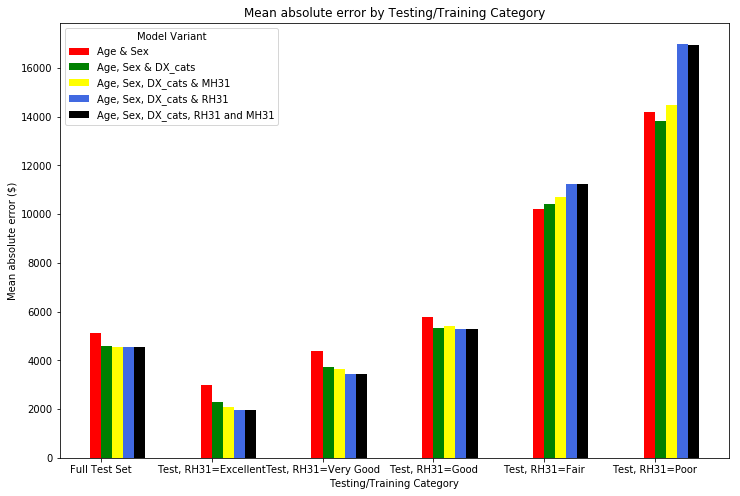

In [37]:

# Plot Bar graph - expenditures w/r/t age
# Adapted code from https://matplotlib.org/examples/api/barchart_demo.html
N = 6

ind = np.arange(N)  # the x locations for the groups
width = 0.10       # the width of the bars

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, tta_by_cat_no_r2.age_sex, width, color='red')
rects2 = ax.bar(ind+width, tta_by_cat_no_r2.age_sex_dx, width, color='green')
rects3 = ax.bar(ind+width*2, tta_by_cat_no_r2.age_sex_dx_mh, width, color='yellow')
rects4 = ax.bar(ind+width*3, tta_by_cat_no_r2.age_sex_dx_rh, width, color='royalblue')
rects5 = ax.bar(ind+width*4, tta_by_cat_no_r2.age_sex_dx_rh_mh, width, color='black')


# add some
ax.set_ylabel('Mean absolute error ($)'), ax.set_xlabel('Testing/Training Category')
ax.set_title('Mean absolute error by Testing/Training Category')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels( ('Full Test Set', 'Test, RH31=Excellent', 'Test, RH31=Very Good', 'Test, RH31=Good', 'Test, RH31=Fair', 'Test, RH31=Poor') )

ax.legend((rects1[0], rects2[0], rects3[0], rects4[0], rects5[0]), ('Age & Sex','Age, Sex & DX_cats','Age, Sex, DX_cats & MH31','Age, Sex, DX_cats & RH31','Age, Sex, DX_cats, RH31 and MH31'), title='Model Variant' )

plt.show()


### R2 Values

In [38]:
# Graph r2 values
test_r2_df = tta_by_cat.loc['test_r2_all']
test_r2_df

age_sex             0.055146
age_sex_dx          0.131062
age_sex_dx_mh       0.137580
age_sex_dx_rh       0.141176
age_sex_dx_rh_mh    0.142265
Name: test_r2_all, dtype: float64

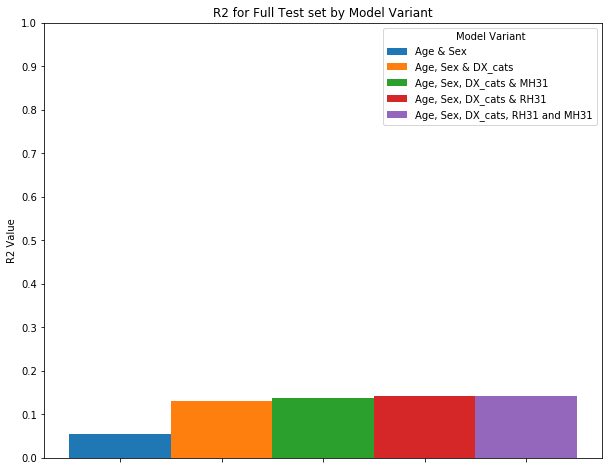

In [39]:
N = 1

ind = np.arange(N)  # the x locations for the groups
width = 0.10       # the width of the bars

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, test_r2_df.age_sex, width)
rects2 = ax.bar(ind+width, test_r2_df.age_sex_dx, width)
rects3 = ax.bar(ind+width*2, test_r2_df.age_sex_dx_mh, width)
rects4 = ax.bar(ind+width*3, test_r2_df.age_sex_dx_rh, width)
rects5 = ax.bar(ind+width*4, test_r2_df.age_sex_dx_rh_mh, width)


# add some
ax.set_ylabel('R2 Value')
ax.set_title('R2 for Full Test set by Model Variant')
ax.set_xticklabels('')
ax.set_yticks(np.arange(0, 1.1, 0.1))

ax.legend((rects1[0], rects2[0], rects3[0], rects4[0], rects5[0]), ('Age & Sex','Age, Sex & DX_cats','Age, Sex, DX_cats & MH31','Age, Sex, DX_cats & RH31','Age, Sex, DX_cats, RH31 and MH31'), title='Model Variant' )

plt.show()


### Mean Error

In [40]:
# Organize Data
# Note - positive = underprediction, negative = overprediction
mean_err_df = pd.DataFrame(mean_errors)
mean_err_df = mean_err_df.reindex(index=['test_all', 'test_e', 'test_vg', 'test_g', 'test_f', 'test_p'])
mean_err_df

,age_sex,age_sex_dx,age_sex_dx_mh,age_sex_dx_rh,age_sex_dx_rh_mh
test_all,85.406180,105.479716,113.575591,89.648089,96.315017
test_e,-1149.250300,-591.657175,-353.833196,-74.073611,-72.956313
test_vg,-1136.827068,-534.155042,-363.025975,-1.647878,0.493147
test_g,233.557594,173.991265,23.439629,331.593613,323.481739
test_f,4543.817690,2570.294155,2125.578816,1017.961426,1072.326881
test_p,9991.546673,5516.244901,4106.944538,-2173.533541,-2098.026397


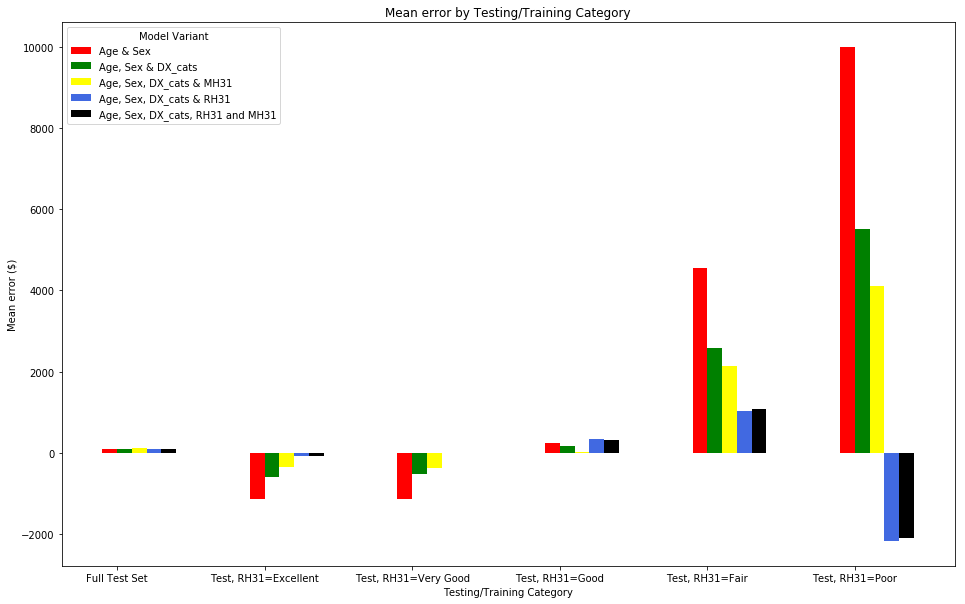

In [41]:
# Graph mean errors

# Plot Bar graph - expenditures w/r/t age
# Adapted code from https://matplotlib.org/examples/api/barchart_demo.html
N = 6

ind = np.arange(N)  # the x locations for the groups
width = 0.10       # the width of the bars

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, mean_err_df.age_sex, width, color='red')
rects2 = ax.bar(ind+width, mean_err_df.age_sex_dx, width, color='green')
rects3 = ax.bar(ind+width*2, mean_err_df.age_sex_dx_mh, width, color='yellow')
rects4 = ax.bar(ind+width*3, mean_err_df.age_sex_dx_rh, width, color='royalblue')
rects5 = ax.bar(ind+width*4, mean_err_df.age_sex_dx_rh_mh, width, color='black')


# add some descriptors
ax.set_ylabel('Mean error ($)'), ax.set_xlabel('Testing/Training Category')
ax.set_title('Mean error by Testing/Training Category')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels( ('Full Test Set', 'Test, RH31=Excellent', 'Test, RH31=Very Good', 'Test, RH31=Good', 'Test, RH31=Fair', 'Test, RH31=Poor') )

ax.legend((rects1[0], rects2[0], rects3[0], rects4[0], rects5[0]), ('Age & Sex','Age, Sex & DX_cats','Age, Sex, DX_cats & MH31','Age, Sex, DX_cats & RH31','Age, Sex, DX_cats, RH31 and MH31'), title='Model Variant' )

plt.show()


Text(0.5,1,u'Mean error by Testing/Training Category')

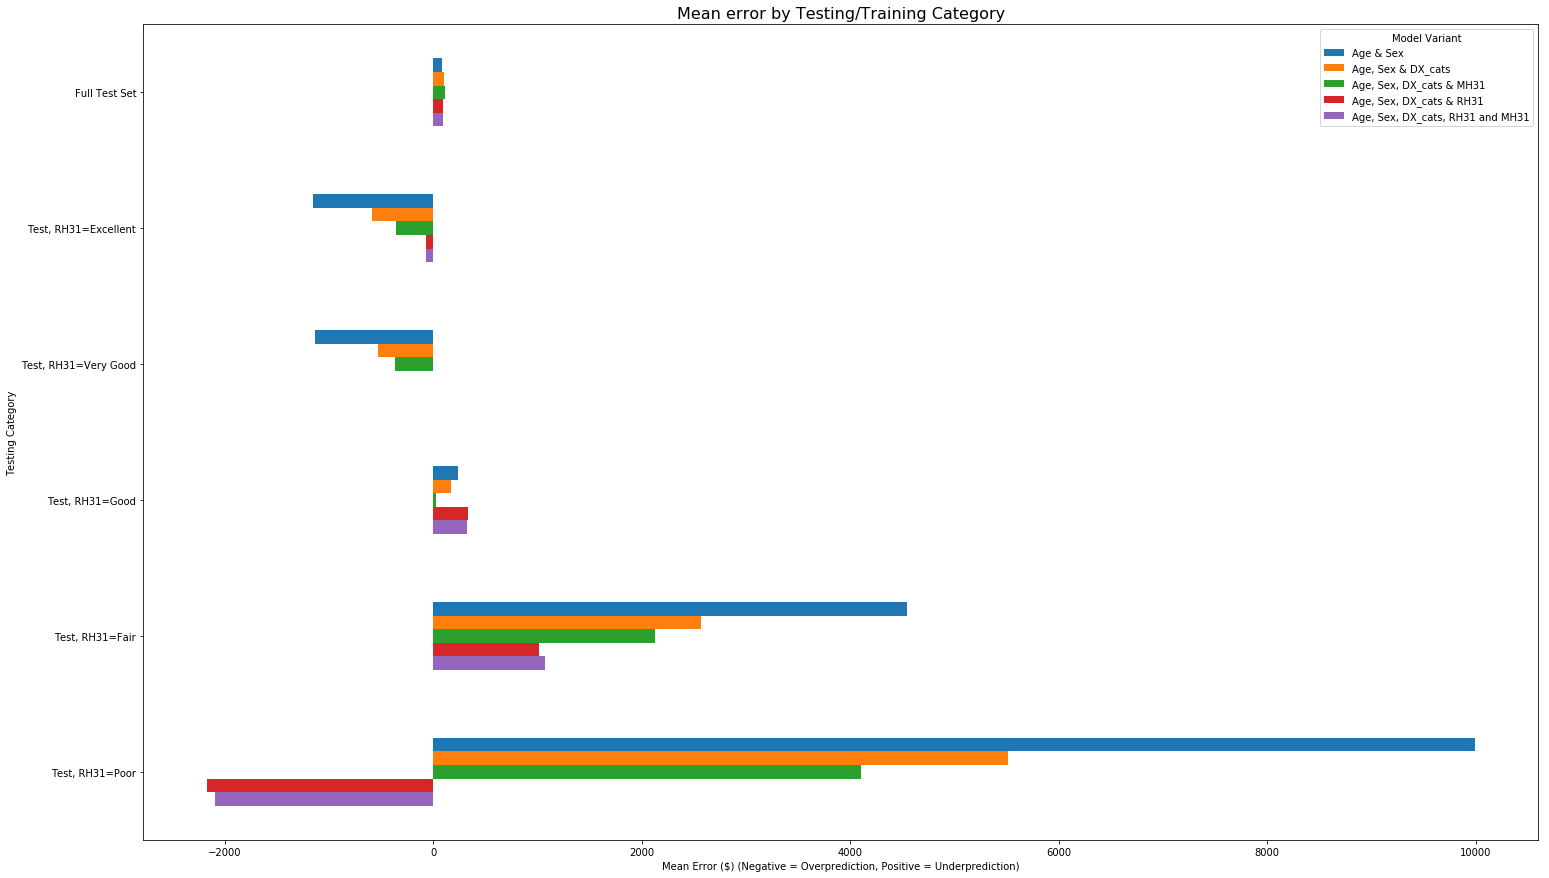

In [42]:
mean_err_df.plot.barh(figsize=(25,15))

ax = plt.gca()

ax.invert_yaxis()
ax.set_yticklabels(('Full Test Set', 'Test, RH31=Excellent', 'Test, RH31=Very Good', 'Test, RH31=Good', 'Test, RH31=Fair', 'Test, RH31=Poor'))
ax.legend(('Age & Sex','Age, Sex & DX_cats','Age, Sex, DX_cats & MH31','Age, Sex, DX_cats & RH31','Age, Sex, DX_cats, RH31 and MH31'), title='Model Variant')
ax.set_ylabel('Testing Category'), ax.set_xlabel('Mean Error ($) (Negative = Overprediction, Positive = Underprediction)')
ax.set_title('Mean error by Testing/Training Category', fontsize=16)






## Validation Plots

In [43]:
lm = smf.ols(formula=model_variants[-1], data=train_df).fit()
predicted_exp = lm.predict(test_df)
real_exp = test_df['tot_exp']

Text(0.5,1,u'Diagnostic Plot (Real vs Predicted) - Linear Regression, Model Variant with Age, Sex, DX, MH, RH')

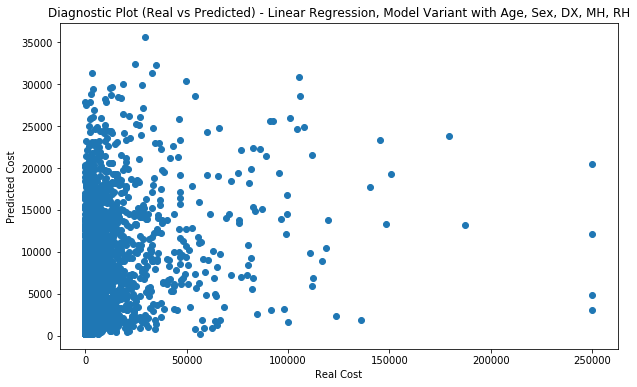

In [44]:
# Plot real vs predicted for final model (with everything in it)
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(real_exp, predicted_exp)
ax.set_ylabel('Predicted Cost'), ax.set_xlabel('Real Cost')
ax.set_title('Diagnostic Plot (Real vs Predicted) - Linear Regression, Model Variant with Age, Sex, DX, MH, RH')

In [45]:
lm = smf.ols(formula=model_variants[0], data=train_df).fit()
predicted_exp = lm.predict(test_df)
real_exp = test_df['tot_exp']

Text(0.5,1,u'Diagnostic Plot (Real vs Predicted) - Linear Regression, Model Variant with Age, Sex')

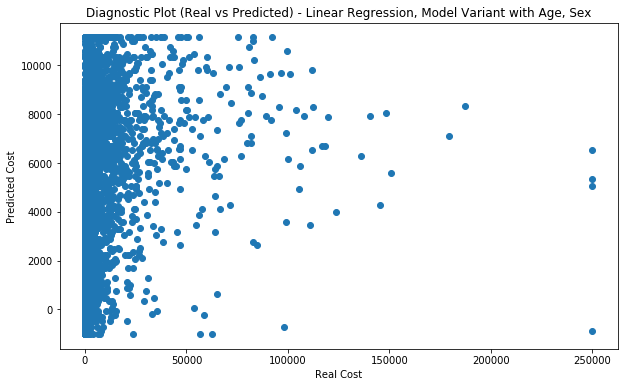

In [46]:
# Plot real vs predicted for final model (with everything in it)
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(real_exp, predicted_exp)
ax.set_ylabel('Predicted Cost'), ax.set_xlabel('Real Cost')
ax.set_title('Diagnostic Plot (Real vs Predicted) - Linear Regression, Model Variant with Age, Sex')

In [47]:
lm = smf.ols(formula=model_variants[1], data=train_df).fit()
predicted_exp = lm.predict(test_df)
real_exp = test_df['tot_exp']

Text(0.5,1,u'Diagnostic Plot (Real vs Predicted) - Linear Regression, Model Variant with Age, Sex, Dx')

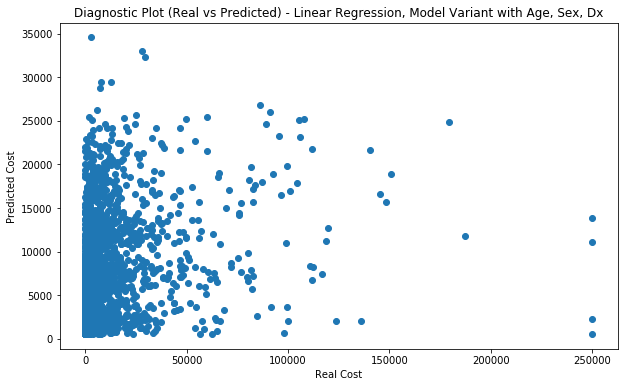

In [48]:
# Plot real vs predicted for final model (with everything in it)
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(real_exp, predicted_exp)
ax.set_ylabel('Predicted Cost'), ax.set_xlabel('Real Cost')
ax.set_title('Diagnostic Plot (Real vs Predicted) - Linear Regression, Model Variant with Age, Sex, Dx')

#### Try out some interaction variables

In [49]:
# Train data on age, sex, diagnoses, and self-assessed health (overall and mental)
lm = smf.ols(formula='tot_exp ~ age_cat + sex + dx_canc + dx_arth + dx_asth + dx_COPD + dx_diab + dx_hyplp + dx_hyptn + dx_IHD + dx_strk + rh53 + mh53 + age_cat*rh53', data=train_df).fit()

In [50]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tot_exp   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     120.1
Date:                Thu, 07 Jun 2018   Prob (F-statistic):               0.00
Time:                        14:13:14   Log-Likelihood:            -2.9018e+05
No. Observations:               27090   AIC:                         5.805e+05
Df Residuals:                   27046   BIC:                         5.808e+05
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                           2.413e+04    930.442     25.937      0.000    2.23e+04     2.6e+04
age_cat[T.5-17]                      205.0161    412.712      0.497      0.619    -603.920    1013.952
age_cat[T.18-24]                     221.4115    488.662      0.453      0.650    -736.391    1179.214
age_cat[T.25-44]                     817.2065    436.394      1.873      0.061     -38.148    1672.561
age_cat[T.45-64]                     540.2961    482.901      1.119      0.263    -406.215    1486.807
age_cat[T.65-85]                    1733.4844    615.693      2.816      0.005     526.694    2940.274
sex[T.female]                        566.9599    133.685      4.241      0.000     304.931     828.989
dx_canc[T.No]                      -4048.3859    290.702    -13.926      0.000   -4618.176   -3478.596
dx_arth[T.No]                      -2722.7436    211.968    -12.845      0.000   -3138.213   -2307.275
dx_asth[T.No]                      -1320.3971    224.998     -5.868      0.000   -1761.406    -879.388
dx_COPD[T.No]                      -1423.3143    602.216     -2.363      0.018   -2603.688    -242.940
dx_diab[T.No]                      -2707.7492    274.661     -9.859      0.000   -3246.099   -2169.400
dx_hyplp[T.No]                      -317.0229    204.259     -1.552      0.121    -717.382      83.336
dx_hyptn[T.No]                      -882.3532    202.769     -4.352      0.000   -1279.792    -484.915
dx_IHD[T.No]                       -4585.1476    392.102    -11.694      0.000   -5353.688   -3816.607
dx_strk[T.No]                      -5742.8657    417.464    -13.757      0.000   -6561.118   -4924.614
rh53[T.Very Good]                    284.7895    684.409      0.416      0.677   -1056.688    1626.267
rh53[T.Good]                        1706.2797    838.982      2.034      0.042      61.831    3350.728
rh53[T.Fair]                        1390.8249   1827.972      0.761      0.447   -2192.095    4973.745
rh53[T.Poor]                        7581.5060   5447.841      1.392      0.164   -3096.544    1.83e+04
mh53[T.Very Good]                    439.7748    197.428      2.228      0.026      52.805     826.744
mh53[T.Good]                        -118.5471    214.085     -0.554      0.580    -538.165     301.071
mh53[T.Fair]                         994.1238    345.630      2.876      0.004     316.671    1671.577
mh53[T.Poor]                        4867.2793    629.645      7.730      0.000    3633.143    6101.416
age_cat[T.5-17]:rh53[T.Very Good]   -294.9330    757.036     -0.390      0.697   -1778.762    1188.896
age_cat[T.18-24]:rh53[T.Very Good]  -146.5439    847.855     -0.173      0.863   -1808.384    1515.296
age_cat[T.25-44]:rh53[T.Very Good]  -419.1065    749.911     -0.559      0.576   -1888.970    10

In [51]:
predicted_exp4 = lm.predict(train_df)

# why is this from the train_df column and not the original data?
real_exp4 = train_df['tot_exp']

print "Training R2 (age, sex, diag, RH53, MH53):", r2_score(real_exp4, predicted_exp4)
print "Training Mean abs error (age, sex, diag, RH53, MH53):", mean_absolute_error(real_exp4, predicted_exp4)

Training R2 (age, sex, diag, RH53, MH53):

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
predicted_exp4 = lm.predict(test_df)

# why is this from the train_df column and not the original data?
real_exp4 = test_df['tot_exp']

print "Test R2 (age, sex, diag, RH53, MH53):", r2_score(real_exp4, predicted_exp4)
print "Test Mean abs error (age, sex, diag, RH53, MH53):", mean_absolute_error(real_exp4, predicted_exp4)

#### Train without age - this seems to work better?

In [52]:
# Train data on age, sex, diagnoses, and self-assessed health (overall and mental)
lm = smf.ols(formula='tot_exp ~ sex + dx_canc + dx_arth + dx_asth + dx_COPD + dx_diab + dx_hyplp + dx_hyptn + dx_IHD + dx_strk + rh53 + mh53', data=train_df).fit()

In [53]:
predicted_exp4 = lm.predict(train_df)

# why is this from the train_df column and not the original data?
real_exp4 = train_df['tot_exp']

print "Training R2 (age, sex, diag, RH53, MH53):", r2_score(real_exp4, predicted_exp4)
print "Training Mean abs error (age, sex, diag, RH53, MH53):", mean_absolute_error(real_exp4, predicted_exp4)

Training R2 (age, sex, diag, RH53, MH53):

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [54]:
predicted_exp4 = lm.predict(test_df)

# why is this from the train_df column and not the original data?
real_exp4 = test_df['tot_exp']

print "Test R2 (age, sex, diag, RH53, MH53):", r2_score(real_exp4, predicted_exp4)
print "Test Mean abs error (age, sex, diag, RH53, MH53):", mean_absolute_error(real_exp4, predicted_exp4)

 Test R2 (age, sex, diag, RH53, MH53):

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

#### Drop Hyplp

In [55]:
# Train data on age, sex, diagnoses, and self-assessed health (overall and mental)
lm = smf.ols(formula='tot_exp ~ age_cat + sex + dx_canc + dx_arth + dx_asth + dx_COPD + dx_diab + dx_hyptn + dx_IHD + dx_strk + rh53 + mh53', data=train_df).fit()

In [56]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tot_exp   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     231.1
Date:                Thu, 07 Jun 2018   Prob (F-statistic):               0.00
Time:                        14:13:16   Log-Likelihood:            -2.9022e+05
No. Observations:               27090   AIC:                         5.805e+05
Df Residuals:                   27067   BIC:                         5.807e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2.482e+04    895.160     27.728      0.000    2.31e+04    2.66e+04
age_cat[T.5-17]      26.7348    314.421      0.085      0.932    -589.546     643.016
age_cat[T.18-24]    105.5594    353.270      0.299      0.765    -586.868     797.986
age_cat[T.25-44]    316.6596    311.321      1.017      0.309    -293.546     926.865
age_cat[T.45-64]    855.5851    328.290      2.606      0.009     212.119    1499.051
age_cat[T.65-85]   1729.6805    382.371      4.524      0.000     980.214    2479.147
sex[T.female]       550.3575    133.597      4.120      0.000     288.501     812.214
dx_canc[T.No]     -4080.9392    290.639    -14.041      0.000   -4650.608   -3511.271
dx_arth[T.No]     -2823.4233    210.559    -13.409      0.000   -3236.131   -2410.716
dx_asth[T.No]     -1289.5550    224.647     -5.740      0.000   -1729.874    -849.236
dx_COPD[T.No]     -1625.6307    601.124     -2.704      0.007   -2803.865    -447.397
dx_diab[T.No]     -2881.1915    270.523    -10.650      0.000   -3411.430   -2350.953
dx_hyptn[T.No]     -976.4301    197.279     -4.949      0.000   -1363.108    -589.752
dx_IHD[T.No]      -4756.7197    388.452    -12.245      0.000   -5518.106   -3995.333
dx_strk[T.No]     -5842.5333    416.260    -14.036      0.000   -6658.425   -5026.642
rh53[T.Very Good]  -135.5416    205.526     -0.659      0.510    -538.383     267.300
rh53[T.Good]       1017.0170    227.060      4.479      0.000     571.968    1462.066
rh53[T.Fair]       2765.9753    313.351      8.827      0.000    2151.792    3380.159
rh53[T.Poor]       1.057e+04    519.811     20.337      0.000    9552.421    1.16e+04
mh53[T.Very Good]   454.1740    197.113      2.304      0.021      67.823     840.525
mh53[T.Good]       -111.8053    213.590     -0.523      0.601    -530.453     306.842
mh53[T.Fair]       1099.6540    344.659      3.191      0.001     424.104    1775.204
mh53[T.Poor]       4681.6144    625.493      7.485      0.000    3455.615    5907.613
==============================================================================
Omnibus:                    39594.565   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         18985452.528
Skew:                           8.823   Prob(JB):                         0.00
Kurtosis:                     131.485   Cond. No.                         45.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
predicted_exp4 = lm.predict(train_df)

# why is this from the train_df column and not the original data?
real_exp4 = train_df['tot_exp']

print "Training R2 (age, sex, diag, RH53, MH53):", r2_score(real_exp4, predicted_exp4)
print "Training Mean abs error (age, sex, diag, RH53, MH53):", mean_absolute_error(real_exp4, predicted_exp4)

Training R2 (age, sex, diag, RH53, MH53):

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [58]:
predicted_exp4 = lm.predict(test_df)

# why is this from the train_df column and not the original data?
real_exp4 = test_df['tot_exp']

print "Test R2 (age, sex, diag, RH53, MH53):", r2_score(real_exp4, predicted_exp4)
print "Test Mean abs error (age, sex, diag, RH53, MH53):", mean_absolute_error(real_exp4, predicted_exp4)

 Test R2 (age, sex, diag, RH53, MH53):

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

#### Last model (i.e. the one with everything in it) - Testing for those who said excellent but had cancer

## Save revised dataset

In [59]:
with open('categorical_meps_2015.pkl', 'wb') as newdata:
    pickle.dump(data, newdata)